# 회귀(Regression)에 대하여

## 회귀분석이란?

**회귀분석**: 관찰 데이터를 기반으로 각 연속형 변수 간의 관계를 모델링하고 이에 대한 적합도를 측정하는 분석 방법

오늘날 회귀분석이란 두 개 이상의 변수 사이의 함수관계를 추구하는 통계적 방법을 의미한다.



![](https://www.biostat.jhsph.edu/courses/bio653/misc/Regr_FigA2.gif)
출처: http://www.biostat.jhsph.edu/courses/bio653/misc/JMPer%20Cable%20Summer%2098%20Why%20is%20it%20called%20Regression.htm


위 그림처럼 두 변수 사이 관계를 직선형태로 가정하고 분석하는 것을 Linear Regression이라고 한다. 선형 회귀분석은 간단하고 실생활에 적용되는 경우가 많기 때문에, **선형 회귀분석의 기본 가정** 내에 문제가 들어온다면 일단 먼저 회귀 분석을 시도해보는 만큼 문제를 해결할 때 가장 많이 이용하게 되는 방식이다.

- 선형 회귀분석의 기본 가정:
  1. 선형성: 예측하고자는 독립변수 x와 종속변수 y간의 간에 선형성을 만족하는 특성
  2. 독립성: "다중 회귀분석에서" 독립변수 x 간에 상관관계가 없이 독립성을 만족하는 특성
  3. 등분산성: 분산이 같은지 (=특정한 패턴 없이 고르게 분포했는지)
  4. 정규성: 잔차가 정규성을 만족하는지 여부로, 정규분포를 띄는지

[참고: 선형 회귀분석의 4가지 기본가정](https://kkokkilkon.tistory.com/175)

## 지도학습의 두 종류: 분류와 회귀
- 분류: 데이터 x의 여러 feature 값을 이용하여 해당 데이터의 **클래스 y를 추론**하는 것
  - 클래스를 추론하기 위해 클래스별 확률 값을 출력함
- 회귀: 데이터 x의 여러 feature 값을 이용하여 **연관된 다른 데이터 y의 정확한 값을 추론**하는 것
  - 연관된 종속변수 값을 직접 출력함


# 선형 회귀 분석(Linear Regression)

`Linear regression`: 종속변수 y와 한 개 이상의 독립변수 x와의 선형 상관관계를 모델링하는 회귀분석 기법. 독립변수의 개수에 따라 단순 선형회귀/다중 선형회귀라고 불린다.

## 1. 선형회귀 모델링

선형회귀식은 `y=βx+ϵ`와 같이 나타낸다. β는 **회귀계수**라고 불리며, ϵ는 **종속 변수와 독립 변수 사이에 오차**를 의미한다. 이들을 데이터로부터 추정해야 하는 **파라미터**이며, 이 데이터로부터 추정한 값을 바탕으로 모델링을 수행한다. 즉, 선형회귀 모델을 찾는다는 것은 **주어진 데이터에 선형 식이 맞도록 회귀계수 및 오차를 구하는 것**이다.

## 2. 머신러닝에서의 선형회귀모델 표기법

머신러닝 기반의 방법에서는 위와는 조금 다르게 표현하는데, `H=Wx+b`와 같이 표현한다. H는 hypothesis, W는 Weight, b는 bias로 명명한다. 대부분의 경우 W, b는 고차원의 Matrix형태를 띄고 있다.

## 3. 용어 설명
- 잔차(Residuals): 회귀모델을 이용해 추정한 값과 실제 데이터의 차이
- Loss function: 회귀계수를 구하는 과정에 쓰이는 함수(ex. MSE)
잔차를 구하는 방법 중 하나인 최소제곱법을 알아보자.

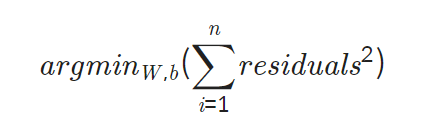

최고제곱법은 n개의 점 데이터에 대해 잔차의 제곱의 합을 최소로 하는 W, b를 구하는 방법이다. 

회귀모델이 잘 결정되었는지 확일할 때 참고하는 지표로는 **R-squared, R2 score**등이 있다.

실제 코드를 통해 Boston dataset의 각각의 attribute에 선형 회귀ㅣ 모델을 구해보고, 모델의 결정계수를 확인해보자.

## 4. 데이터셋 준비하기
- scikit-learn lib에서 제공하는 `Boston house prices dataset`을 사용한다.

In [3]:
from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

# 데이터 로드
boston = load_boston()
data, price = boston['data'], boston['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

df = pd.DataFrame(x_train, columns=boston['feature_names'])
print("boston dataset의 차원: ", data.shape)
print("price의 차원", price.shape)
print("boston train dataset의 차원: ", x_train.shape)
print("boston test dataset의 차원: ", x_test.shape)

print("Boston dataset의 예시")
df.head() # data 요약

boston dataset의 차원:  (506, 13)
price의 차원 (506,)
boston train dataset의 차원:  (404, 13)
boston test dataset의 차원:  (102, 13)
Boston dataset의 예시


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.32264,0.0,21.89,0.0,0.6240,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90
1,0.02055,85.0,0.74,0.0,0.4100,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
2,0.11132,0.0,27.74,0.0,0.6090,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35
3,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05
4,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66


In [16]:
# 각 attribute 확인
print(boston.keys())
print(boston["DESCR"]) 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

## 5. Linear Regression 적용하기

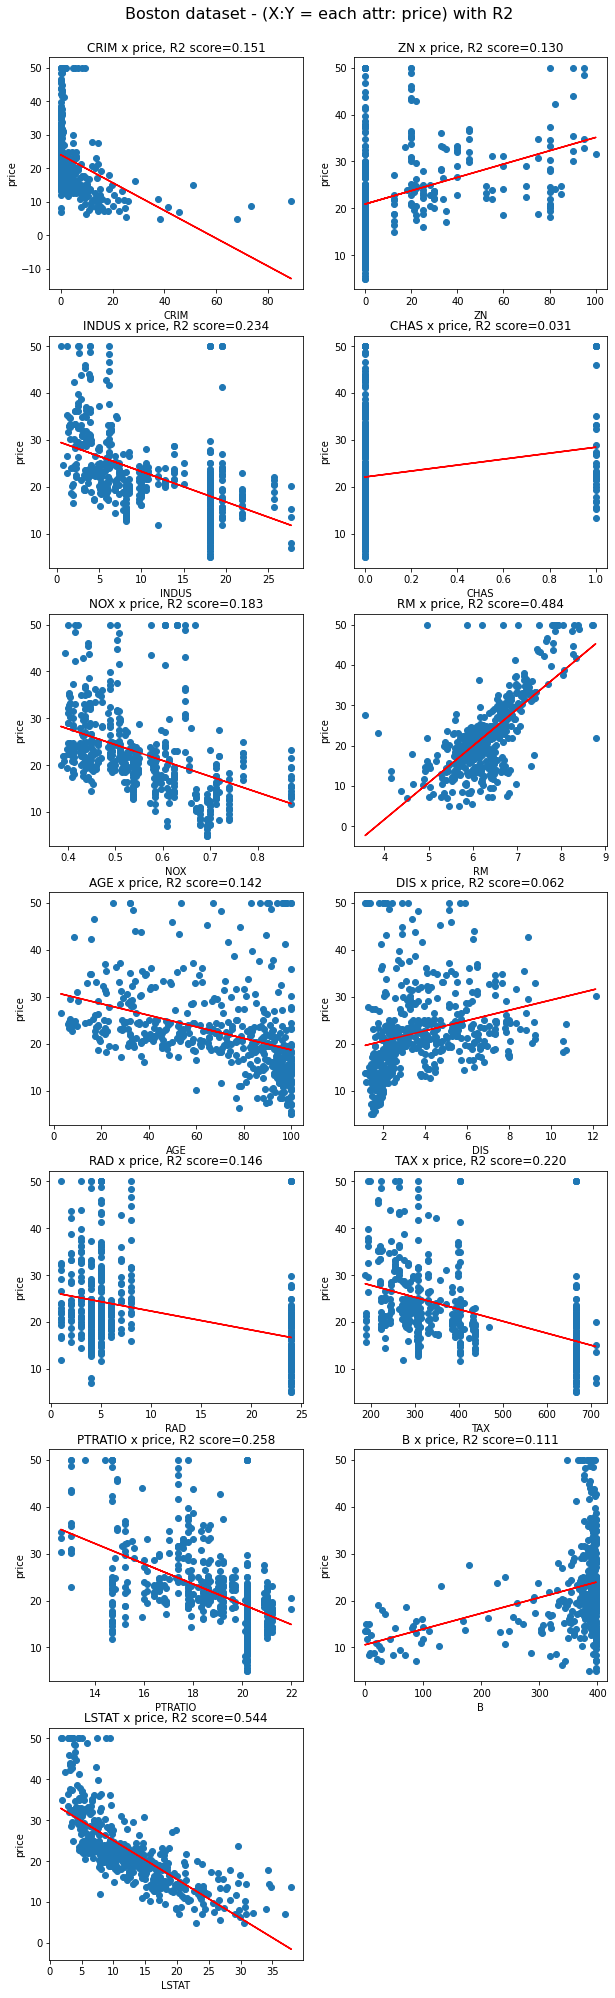

In [18]:
# Boston dataset의 각 attribute에 선형회귀 적용하는 예제
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]): # boston dataset에서 i번째 attribute(column)을 살펴볼 거에요.

    single_attr, attr_name = data[:, i].reshape(-1, 1), boston['feature_names'][i] # i번째 attribute에 대한 data 및 이름
    estimator = LinearRegression() # 선형 회귀 모델이에요.

    #x에는 single_attr, y에는 price에 해당하는 데이터를 대입해서 최소제곱법을 이용하여 모델 내에서 W, b를 구하는 과정이에요
    estimator.fit(single_attr, price) 

    #위 fit() 과정을 통해 구한 회귀계수를 기반으로 회귀모델에 X값을 대입했을 때의 예측 Y 값이에요. 
    pred_price = estimator.predict(single_attr)

    score = metrics.r2_score(price, pred_price) # 결정계수를 구하는 함수에요. 

    # 캔버스 생성
    ax = fig.add_subplot(7, 2, i+1)
    ax.scatter(single_attr, price) # 실제 데이터에 대한 산포도
    ax.plot(single_attr, pred_price, color='red') # 선형회귀모델의 추세선
    ax.set_title("{} x price, R2 score={:.3f}".format(attr_name ,score)) #subplot의 제목이에요
    ax.set_xlabel(attr_name) # x축
    ax.set_ylabel('price') # y축

위에서 보았듯, R2 score가 높은 LSTAT와 RM을 이용해 그린 모델이 데이터를 상대적으로 잘 설명함을 확인할 수 있다.

## 6. Gradient Descent Algorithm


![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FNc7Ho%2FbtqBLHKc17S%2FuYR1YABBefaW0FzXc7G0S1%2Fimg.png)
[출처:https://lsh424.tistory.com/9]

J(W)를 최소로 하는 가중치 값을 가지려면, 기울기(그래디언트) 값이 0인 중앙에 놓는 것이 좋다. 이 minimum으로 가기 위해 gradient 값을 다음 식을 통해 업데이트 한다.

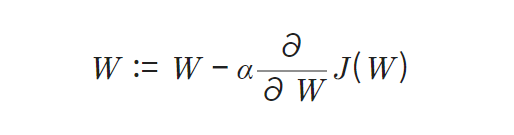

α는 learning rate이며, 값에 따라 수렴의 정도가 달라진다.

# 로지스틱 회귀분석(Logistic Regression)

`Logistic Regression`: 어떤 데이터가 어떤 범주에 속할 확률을 0~1사이 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 **분류해주는 지도 학습 알고리즘**

## 1. 정의 및 용어 설명

로지스틱 회귀식은 다음과 같이 나타낼 수 있다. 만일 종속변수가 0일 확률을 P(y=0∣x)라고 하면, 식은 다음과 같다.

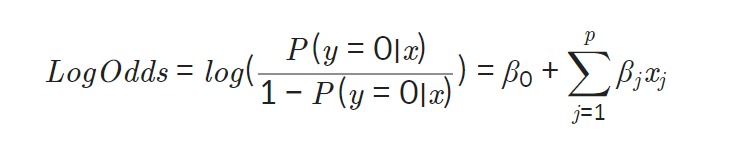

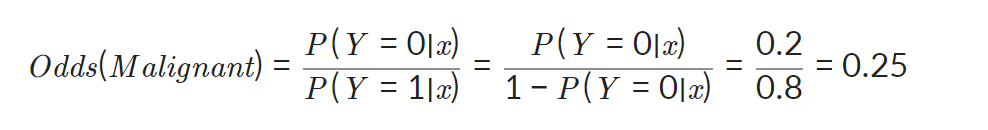

`Odds = (사건이 발생할 확률)/(사건이 발생하지 않을 확률)`이다. 이 값에 log를 취한 값을 Log-odds라고 부른다. 이 Log-odds의 형식이 맨 처음 나온 좌변의 식과 같음을 확인할 수 있다. 결국 이 log-oods라는 값을 선형회귀분석의 종속변수처럼 구하면 된다.

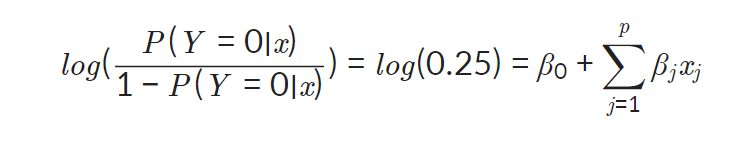

위 식에 데이터를 이용하면, 회귀계수(β)값을 구할 수 있다.

하지만, 우리가 실제로 원하는 값은 log-odds 값이 아니다. 우리는 종속변수가 0일 확률, 1일 확률을 원한다!! 그래서 log-odds로부터 특정 범주에 속할 확률을 얻기 위해 log-odds의 식을  P(Y=0|x)P(Y=0∣x)에 대해서 다시 정리하게 되면 다음과 같은 식을 얻을 수 있다.

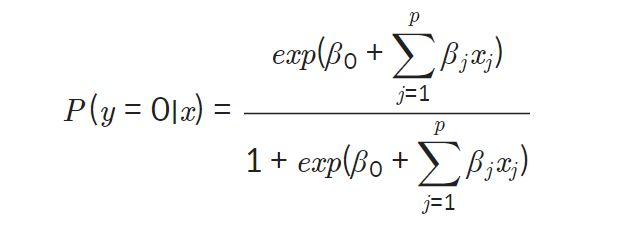

z로 정리하면 다음과 같이 표현될 수 있다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/F-45-sigmoid.max-800x600.png)
[출처 : https://medium.com/@toprak.mhmt/activation-functions-for-deep-learning-13d8b9b20e]

sigmoid function의 형태이다!! 이 함수는 선형 회구모델로 표현한 것이 아니라, 위 그래프에서 z=0인 지점을 중심으로 두 범주 간 경계가 불명확해지는 x의 구간(0.3 < p < 0.7)을 최소화해주기 때문에 분류모델의 분류 성능을 향상시켜 준다.

## 2. 데이터 개요

유방암 데이터셋을 사용하자.

In [19]:
# 로지스틱 회귀분석 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y = 0(Malignant - 악성 종양), y=1(Benign - 양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Attribute 수: {}".format(len(cancer_X[0])))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Attribute 수: 30
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 3. 로지스틱 회귀분석 예제

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression() #로지스틱 회귀분석
LR.fit(train_X, train_y) # 유방암 train data를 이용하여 로지스틱 회귀분석 모델 학습
pred = LR.predict(test_X) # 학습된 로지스틱 회귀분석 모델을 이용한 예측값 출력


# 로지스틱 회귀분석 모델의 예측값과 실제값 비교결과를 나타낸 통계표
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



# Softmax 함수와 Cross Entropy

## 1. Softmax함수

이전 스텝에서는 이진 분류를 수행하는 로지스틱 회귀를 살펴보았다. 하지ㅣ만 로지스틱 회귀는 여러 범주를 분류할 수도 있다(다중 로지스틱 회귀). 이때, 이전 스텝에서 다룬 시그모이드 함수는 softmax함수로 확장되어야 한다.

Softmax는 **2가지 이상의 여러 범주로 분류하는 함수이다.** multi classification에 적합하다.

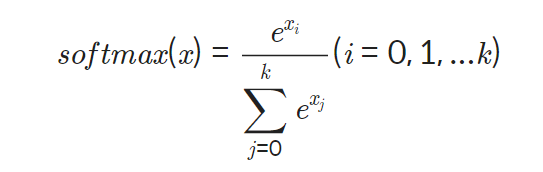

함수식을 보면 알 수 있는 특징은, 모든 범주에 해당하는 softmax 값의 합은 1이라는 점이다. 또한, softmax함수는 큰 log-odds와 작은 log-odds의 차이를 극대화시킨다. 그렇기에 마지막에 softmax함수에 모든 범주의 log-odds를 통과시키면 해당 데이터가 어떤 범주로 분류되는지 **확실히 알 수 있게 되는데**, **가장 큰 값을 1, 그 외 값들을 0으로 인코딩하는 one-hot encoding을 통해 표현**된다.

## 2. Cross Entropy

Cross entropy함수는 위에서 살펴보았던 softmax함수의 손실함수로 쓰인다.

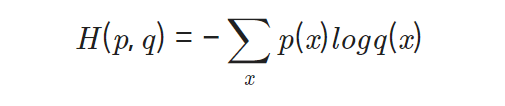

이 역시 loss function이기 때문에 가중치가 최적화될수록 `H(p,q)`의 값이 감소하게 되는 방향으로 학습이 진행된다. `p(x)`는 실제 데이터의 범주 값, `q(x)`는 softmax의 결과값이 대입된다.

👀 왜 손실함수로 Cross Entropy가 선택되었을까?   
- 선형회귀에서의 손실함수는 MSE였다. 이는 L2 distance와는 다소 다르지만, 회귀 모델의 추정치와 실제 값의 종속변수 좌표축 방향으로의 차이, 즉 거리를 측정하기에 적절한 형태를 가지고 있다.
- 하지만, 로지스틱 회귀에서는 종속변수 방향이 바로 확률변수 방향이다. 선형회귀 때처럼 잔차의 제곱 형태로 측정하기엔 적절하지 않을 형태이다. 그렇기에 정보이론(Information Theory)의 개념을 빌리면, Cross Entropy로 회귀ㅣ모델이 추론한 확률 분포 q(x)와 실제 데이터의 분포 p(x)의 차이를 계산했다.

[참고1: 왜 크로스 엔트로피를 쓸까?](https://theeluwin.postype.com/post/6080524)
[참고2: Cross-entropy 의 이해: 정보이론과의 관계](https://3months.tistory.com/436)
[참고3: Understanding Binary cross-entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

## 3. 유방암 데이터셋을 이용한 softmax, cross entropy 예제

이전 스텝에서 다룬 `LogisticRegression`을 이용해 다루었던 유방암 데이터셋을 이용한 로지스틱 회귀를 Tensorflow API를 이용해 구현해보자.

In [22]:
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()

#레이어 3장을 추가
model.add(keras.layers.Dense(n_dense, input_shape=(30,), use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))

model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 62        
Total params: 2,852
Trainable params: 2,852
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 0s 2ms/step - loss: 24.0429 - accuracy: 0.4707
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 4.2636 - accuracy: 0.6973
Epoch 3/20
16/16 [==============================] - 0

# 정리 및 요약

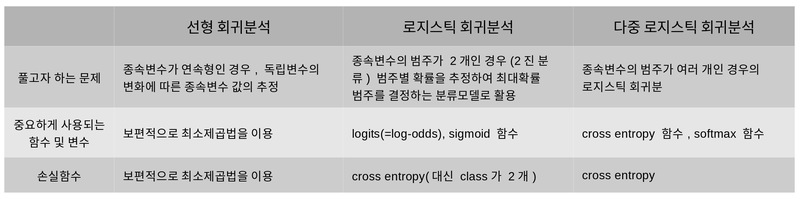